#A Generative Search System for Fashion Product Recommendations

### **Objective:**
**Primary Objective:** To create a generative search system capable of searching a vast array of fashion product descriptions and recommending appropriate choices based on user queries.

**Secondary Objectives:**
•	To develop a fashion query response system that utilizes AI models to provide detailed and user-friendly responses to fashion-related queries.
•	To enhance user experience by generating informative and contextually relevant answers.
•	To assist users in finding fashion items that match their preferences.

## Data Source:
Myntra Fashion Dataset of Women with Text and Images
URL: https://www.kaggle.com/datasets/djagatiya/myntra-fashion-product-dataset

## Project mplementation Scope:

The project involves three main layers: the Embedding Layer, the Search and Rank Layer, and the Generation Layer.
### **The Embedding Layer:**
 This layer is crucial for understanding the meaning of the text and its semantic relationship to the query. It involves two key processes:

o	Text Processing: Cleaning and preparing the text data to ensure consistency and readability.

o	Chunking & Embeddings: Dividing the text into manageable chunks and generating embeddings to represent the semantic content of the text.
### **Search and Rank Layer:**
 Responsible for retrieving relevant fashion items from the dataset based on keyword matching or predefined criteria. It includes:

o	Semantic Search with Cache: Performing searches that consider the semantic meaning of the query and caching results to improve efficiency.

o	Re-Ranking: Refining the search results to prioritize the most relevant items.
### **Generation Layer:**
 Utilizes advanced AI models like GPT-4 to generate detailed, contextually relevant responses to user queries. This layer dynamically produces natural language responses, enhancing the overall user experience.



## 1. Install and Import the Required Libraries

In [ ]:
# Install all the required libraries

!pip install pdfplumber tiktoken openai chromaDB sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 900.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 12.9 MB/s eta

In [ ]:
# Importing necessary libraries
import tiktoken  # Assuming this is a custom library for tokenization
import openai  # OpenAI library for accessing GPT models
import chromadb  # ChromaDB library for database operations
from pathlib import Path  # For handling file paths
import pandas as pd  # Pandas for data manipulation
from operator import itemgetter  # For sorting dictionaries
import json  # For working with JSON data
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorizer
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity calculation
from nltk.corpus import stopwords  # Stopwords for text processing
from nltk.tokenize import word_tokenize  # Tokenization
import string  # String manipulation functions
from PIL import Image  # Image processing library
import requests  # For making HTTP requests
from io import BytesIO  # For handling binary data
import matplotlib.pyplot as plt  # Matplotlib for visualization
from matplotlib import table  # Table visualization in Matplotlib
import os  # Operating system utilities
import matplotlib.image as mpimg

# Import the CrossEncoder library from sentence_transformers
from sentence_transformers import CrossEncoder, util
# Importing required functions and classes from ChromaDB
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Importing the necessary library for mounting Google Drive
from google.colab import drive

# Mounting Google Drive to the Colab environment
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# Read the API key from the text file and strip any leading or trailing whitespace
with open("/content/drive/MyDrive/upgrad_app/genai/OpenAI_API_Key.txt", "r") as f:
    api_key = f.read().strip()

# Set the API key for OpenAI
openai.api_key = api_key

# Read the OpenAI API key
#openai.api_key = open("/content/drive/MyDrive/upgrad_app/genai/OpenAI_API_Key.txt", "r").read().strip()
#os.environ['OPENAI_API_KEY'] = openai.api_key

In [ ]:
os.chdir('/content/drive/MyDrive/upgrad_app/genai/helpmateAI_Q&A_vector_assignment')


## 2. Read, Process the csv Files



In [ ]:
# Read the Fashion Dataset CSV file into a Pandas DataFrame
fashion_data = pd.read_csv('Fashion Dataset v2.csv')

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
fashion_data.head()


,p_id,name,products,price,colour,brand,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099,Black,Khushal K,4522,4.4,Black printed Kurta with Palazzos with dupatta...,"Add-Ons: NA, Body Shape ID: 443,333,324,424, B..."
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899,Orange,InWeave,1081,4.1,"Orange solid Kurta with Palazzos with dupatta,...","Add-Ons: NA, Body Shape ID: 443,333,324,424, B..."
2,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899,Navy Blue,Anubhutee,1752,4.2,Navy blue embroidered Kurta with Trousers with...,"Add-Ons: NA, Body Shape ID: 333,424, Body or G..."
3,14709966,Nayo Women Red Floral Printed Kurta With Trous...,"Kurta, Trouser, Dupatta",3699,Red,Nayo,4113,4.1,"Red printed kurta with trouser and dupatta,Kur...","Add-Ons: NA, Body Shape ID: 333,424, Body or G..."
4,11056154,AHIKA Women Black & Green Printed Straight Kurta,Kurta,1350,Black,AHIKA,21274,4.0,"Black and green printed straight kurta,has a n...","Body Shape ID: 424, Body or Garment Size: Garm..."


In [ ]:
len(fashion_data)

14214

####  2.1 viewing image
Let's view few images provided in the dataset.

Image not found for p_id: 17048614


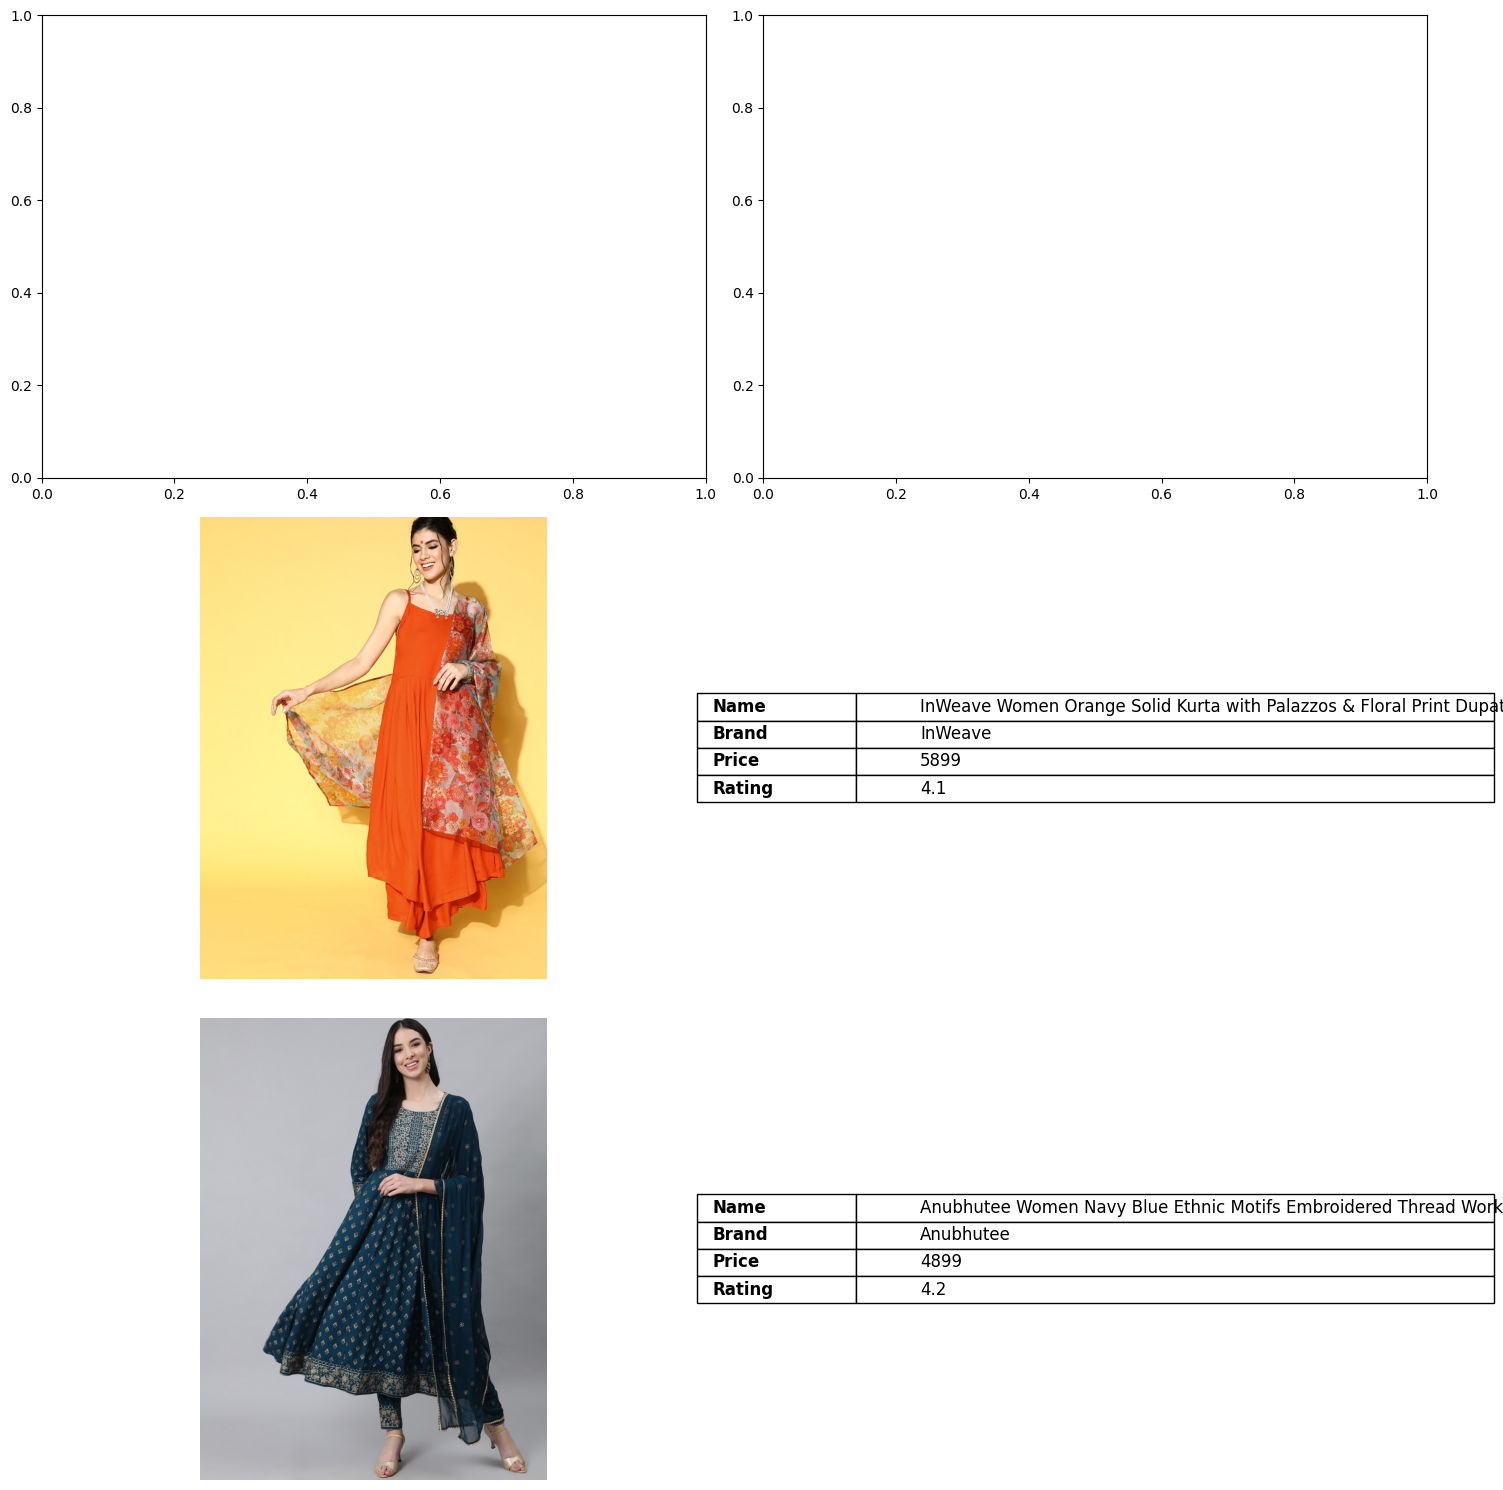

In [ ]:
# Define the path to the images folder
images_folder_path = 'images'

# Define a function to display images with mini tables
def display_images_with_info(df, images_folder_path, num_images=3):
    """
    Display images with accompanying mini tables containing information from the DataFrame.

    Args:
    - df: DataFrame containing image information
    - images_folder_path: Path to the folder containing the images
    - num_images: Number of images to display

    Returns:
    None
    """
    # Create subplots to display images and mini tables
    fig, axes = plt.subplots(num_images, 2, figsize=(15, num_images * 5))

    # Iterate over each row in the DataFrame and display the image with mini table
    for i, (idx, row) in enumerate(df.head(num_images).iterrows()):
        # Construct the path to the image file
        image_path = os.path.join(images_folder_path, str(row['p_id']) + '.jpg')

        # Check if the image file exists
        if os.path.exists(image_path):
            # Open the image file
            img = Image.open(image_path)

            # Display the image
            axes[i, 0].imshow(img)
            axes[i, 0].axis('off')

            # Create a mini table with information from the DataFrame
            table_data = [['Name', row['name']],
                          ['Brand', row['brand']],
                          ['Price', row['price']],
                          ['Rating', row['avg_rating']]]

            axes[i, 1].axis('off')
            mini_table = axes[i, 1].table(cellText=table_data, loc='center', cellLoc='left', colWidths=[0.2, 0.8])

            # Format the mini table
            for cell in mini_table.get_celld().values():
                if cell.get_text().get_text() in ['Name', 'Brand', 'Price', 'Rating']:
                    cell.get_text().set_fontweight('bold')
                cell.get_text().set_fontsize(12)

            # Set font size explicitly for all cells
            mini_table.auto_set_font_size(False)
            mini_table.set_fontsize(12)
            mini_table.scale(1.2, 1.2)  # Adjust the scaling factor as needed
        else:
            print(f"Image not found for p_id: {row['p_id']}")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Display images with mini tables for the first 3 images
display_images_with_info(fashion_data, images_folder_path, num_images=3)


In [ ]:
# Print the columns of the fashion_data DataFrame
print(fashion_data.columns)


Index(['p_id', 'name', 'products', 'price', 'colour', 'brand', 'ratingCount',
       'avg_rating', 'description', 'p_attributes'],
      dtype='object')


In [ ]:
# Print the information about the fashion_data DataFrame
print(fashion_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14214 non-null  int64  
 1   name          14214 non-null  object 
 2   products      14214 non-null  object 
 3   price         14214 non-null  int64  
 4   colour        14214 non-null  object 
 5   brand         14214 non-null  object 
 6   ratingCount   14214 non-null  int64  
 7   avg_rating    14214 non-null  float64
 8   description   14214 non-null  object 
 9   p_attributes  14214 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.1+ MB
None


## 3.Generate Chunk and Store Embeddings using OpenAI and ChromaDB

In this section, we will embed the pages in the dataframe through OpenAI's `text-embedding-ada-002` model, and store them in a ChromaDB collection.

### Embedding Layer

In [ ]:

# Define the path for storing ChromaDB collections
chroma_data_path = 'ChromaDB_Data_2'

# Initialize the ChromaDB client with the specified data path
client = chromadb.PersistentClient(path=chroma_data_path)

# Set up the embedding function using the OpenAI embedding model
model = "text-embedding-ada-002"
embedding_function = OpenAIEmbeddingFunction(api_key=api_key, model_name=model)

# Load the fashion dataset from the CSV file
file_path = 'Fashion Dataset v2.csv'
fashion_data = pd.read_csv(file_path)



In [ ]:
from chromadb import PersistentClient

# Initialize the ChromaDB client with the specified data path
client = PersistentClient(path=chroma_data_path)

# Set up the embedding function using the OpenAI embedding model
model = "text-embedding-ada-002"
embedding_function = OpenAIEmbeddingFunction(api_key=api_key, model_name=model)

# Define the path to the CSV file
file_path = 'Fashion Dataset v2.csv'

# Function to extract text for embedding
def extract_text(metadata):
    """
    Extracts text content from the metadata dictionary for embedding.

    Args:
    metadata (dict): Dictionary containing metadata information.

    Returns:
    str: Text content extracted from the metadata.
    """
    text_content = ""
    if "Description" in metadata and metadata["Description"]:
        text_content += metadata["Description"]
    if "name" in metadata:
        text_content += " " + metadata["name"]
    if not text_content:
        text_content = "No description available."
    return text_content.strip()

# Function to process a chunk of data
def process_chunk(chunk, fashion_collection):
    chunk['metadata'] = chunk.apply(
        lambda x: {
            'Product_id': x['p_id'],
            'Name': x['name'],
            'Product_type': x['products'],
            'Price_INR': x['price'],
            'Colour': x['colour'],
            'Brand': x['brand'],
            'RatingCount': x['ratingCount'],
            'Rating': x['avg_rating'],
            'Description': x['description'],
            'Product_attributes': x['p_attributes']
        }, axis=1
    )

    documents = [extract_text(row['metadata']) for _, row in chunk.iterrows()]

    for idx, (p_id, metadata) in enumerate(zip(chunk['p_id'], chunk['metadata'])):
        print(f"Processing document with p_id={p_id}")
        print(f"Document text: {documents[idx]}")
        try:
            fashion_collection.add(
                documents=[documents[idx]],
                ids=[str(p_id)],
                metadatas=[metadata]
            )
        except Exception as e:
            print(f"Error adding document with p_id={p_id}: {e}")

# Get or create a ChromaDB collection for fashion products
fashion_collection = client.get_or_create_collection(name='Fashion_Products', embedding_function=embedding_function)

# Process the CSV file in chunks
chunk_size = 100  # Adjust the chunk size based on your memory and performance requirements
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    process_chunk(chunk, fashion_collection)

print("Data added to ChromaDB collection!")

fashion_collection.peek(5)



Streaming output truncated to the last 5000 lines.
Document text: Charcoal grey printed Dupatta and has a tasselled borderLength: 2.3metres,Width: 0.9metreMaterial: Silk Blend, Hand Wash
Processing document with p_id=18601482
Document text: White graphic printed open front jacket, has a spread collar, 2  pockets ,has a button closure,long sleeves, straight  hemline,without  liningThe model (height 58) is wearing a size Scotton,Machine Wash
Processing document with p_id=13401782
Document text: Black solid jacket,has a spread collar,4 pockets,button closure,long sleeves,straight hem,and unlined liningThe model (height 58") is wearing a size SMaterial: Cotton, Machine Wash
Processing document with p_id=12178124
Document text: Blue washed jacket,has a spread collar,4 pockets,button closure,long sleeves,straight hem100% cotton,Machine WashThe model (height 58") is wearing a size S
Processing document with p_id=17685324
Document text: Blue solid lightweight denim jacket, has a spread collar,

{'ids': ['10016743', '10019867', '10035883', '10051259', '10053731'],
 'embeddings': [[-0.0076238252222537994,
   6.936817953828722e-05,
   0.011770922690629959,
   0.0017531511839479208,
   0.010837662033736706,
   0.02018999122083187,
   -0.019545910879969597,
   -0.00610234634950757,
   -0.008235045708715916,
   -0.026657098904252052,
   0.024422528222203255,
   0.014288099482655525,
   0.00991097278892994,
   -0.02220110408961773,
   -0.012066674418747425,
   0.0032992761116474867,
   0.017258763313293457,
   0.015444817952811718,
   -0.0008186575141735375,
   -0.0054746950045228004,
   -0.01606260985136032,
   0.022595440968871117,
   0.0005450870376080275,
   -0.011139986105263233,
   0.010653638280928135,
   0.012664751149713993,
   0.007420084904879332,
   -0.014406400732696056,
   0.023988759145140648,
   -0.0026157605461776257,
   0.0005192087846808136,
   -0.007972154766321182,
   -0.007354362402111292,
   -0.03583197668194771,
   -0.006503254175186157,
   0.0056127123534679

In [ ]:
# Specify the name for the cache collection
cache_collection_name = 'Cache_Fashion'

# Create or retrieve the cache collection for fashion search using the PersistentClient
cache_collection = client.get_or_create_collection(name=cache_collection_name, embedding_function=embedding_function)

In [ ]:
# Display a preview of the cache collection to inspect its contents
cache_collection.peek()

{'ids': [],
 'embeddings': [],
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None,
 'included': ['embeddings', 'metadatas', 'documents']}


## 4. Semantic Search with Cache

In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

In [ ]:
# Prompt the user to enter a fashion-related query with specific requirements
query = input("Please enter your fashion-related query. For example, you can mention the color, size, price range, style, and any specific patterns or designs you prefer: ")

#Query 1: I am looking for blue jacket
#Query 2: I am looking for black salwar
#Query 3: I'm searching for a versatile black leather jacket, suitable for various occasions and effortlessly complementing any outfit. Preferably in size XL.
#Query 4: "I'm seeking ethnic attire suitable for adults, with a preference for Ishin brand. These outfits are intended for festival wear. The clothing set I'm looking for should include a Navy Blue and golden foil printed top with a round neck and three-quarter sleeves, along with a matching skirt featuring a drawstring closure. Both pieces should be made of pure cotton."
#Query 5: I'm looking for office wear sarees in elegant colors like pink, violet, or green. I prefer sarees with full embroidered designs, suitable for professional settings. There's no specific price range, as quality is my priority. These sarees will be worn for office meetings and formal events.

Please enter your fashion-related query. For example, you can mention the color, size, price range, style, and any specific patterns or designs you prefer: I am looking for black salwar


In [ ]:
# Search the Cache collection first- cache_collection

cache_results = cache_collection.query(
    query_texts=query,  # User query
    n_results=5  # Number of results to retrieve
)
cache_results



{'ids': [['I am looking for black salwar',
   'I am looking for blue jacket',
   'A beach dress']],
 'distances': [[0.0, 0.3384414373322322, 0.41829036426006033]],
 'metadatas': [[{'distances0': '0.286231130361557',
    'distances1': '0.29053401947021484',
    'distances2': '0.2987998127937317',
    'distances3': '0.3000045120716095',
    'distances4': '0.3048781752586365',
    'documents0': 'Black solid kurta with sharara and dupatta,Black solid straight above knee kurta,has a sweetheart neck,three-quarter sleeves,side slits,Black embroidered sharara,has partially elasticated waistband,slip-on closure,Black embroidered dupatta,has taping borderThe model (height 58") is wearing a size SKurta fabric: poly georgette,Bottom fabric: poly georgette,Dupatta fabric: net,Dry-clean',
    'documents1': 'Black and off-white checked kurta with solid palazzos,Black and off-white checked straight knee length kurta,has a round neck,three-quarter sleeves,straight hem,side slits,Black solid palazzos,ha

### Search Layer

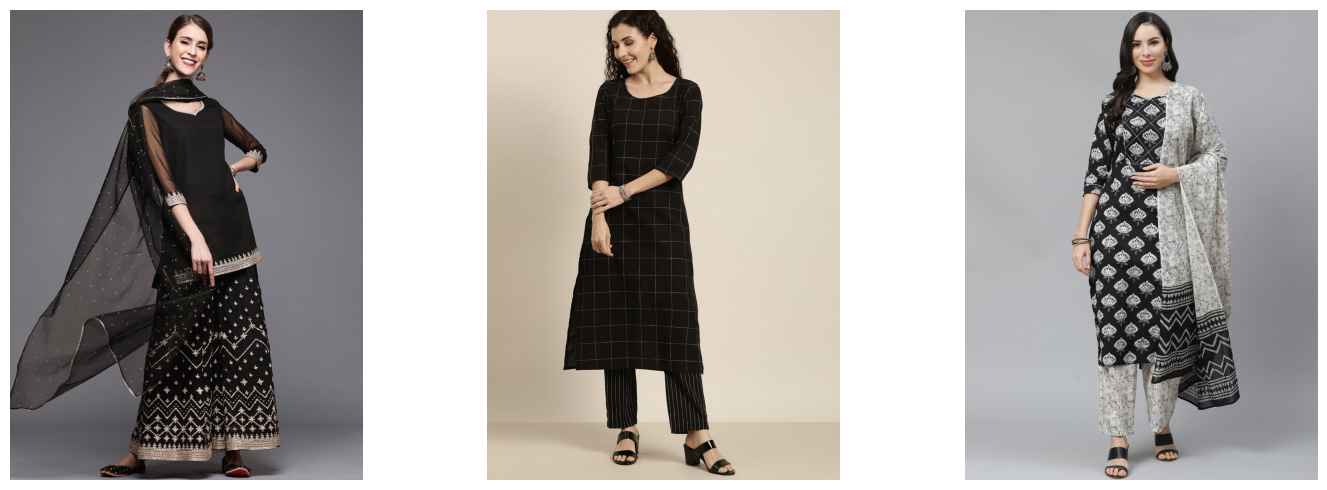

-------------------------------------------------------



dict_items([('ids', [['11611210', '13119222', '14036750']]), ('distances', [[0.286231130361557, 0.29053401947021484, 0.2987998127937317]]), ('metadatas', [[{'Brand': 'Inddus', 'Colour': 'Black', 'Description': 'Black solid kurta with sharara and dupatta,Black solid straight above knee kurta,has a sweetheart neck,three-quarter sleeves,side slits,Black embroidered sharara,has partially elasticated waistband,slip-on closure,Black embroidered dupatta,has taping borderThe model (height 58") is wearing a size SKurta fabric: poly georgette,Bottom fabric: poly georgette,Dupatta fabric: net,Dry-clean', 'Name': 'Inddus Women Black Georgette Kurti with Embroidered Sharara & Dupatta', 'Price_INR': 8499, 'Product_attributes': 'Add-Ons: NA, Body Shape ID: 443,333,324,424, Body or Garment Size: To-Fit Denotes Body Measurements in, Bottom Closure: Slip-On, Bottom Fabric: Poly Georgette, Bottom Pattern: Embroidered, Bottom Type: Sharara, Dupatta: With Dupatta, Dupatta Border: Taping, Dupatta Fabric: Ne

In [ ]:
# Query the fashion collection to retrieve relevant fashion items based on the user query
results = fashion_collection.query(
    query_texts=query,  # User query provided as input
    n_results=3  # Number of results to retrieve, in this case, the top 3 most relevant results
)


import matplotlib.pyplot as plt
import os
from PIL import Image

# Assuming you have already obtained the search results in the variable 'results'

# Extract the IDs of the fashion items from the search results
item_ids = results['ids'][0]  # Assuming the IDs are stored as the first element of the list

# Calculate the number of images
num_images = len(item_ids)

# Define the number of columns for the grid layout
num_cols = 3

# Calculate the number of rows needed based on the number of images and number of columns
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Display the images along with metadata
for i, item_id in enumerate(item_ids):
    # Construct the path to the image file
    image_path = os.path.join(images_folder_path, str(item_id) + '.jpg')

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    else:
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, f"Image not found for item ID: {item_id}",
                     fontsize=12, ha='center', va='center')

# Hide any remaining empty subplots
for j in range(num_images, num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


print("-------------------------------------------------------\n")
# Extract and display the items retrieved from the search operation
results.items()




In [ ]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# Check if the distance is greater than the threshold, if so, return results from the main collection
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the collection against the user query and return the results
    results = fashion_collection.query(
        query_texts=query,
        n_results=5
    )

    # Store the query in cache_collection as a document with respect to ChromaDB for future reference
    # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(val[0])):  # Iterate over the actual length of val
            Keys.append(str(key) + str(i))
            if len(val[0]) > i:  # Check if the current index exists in val
                Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],
        metadatas=dict(zip(Keys, Values))
    )

    # Print message indicating the results are found in the main collection
    print("Not found in cache. Found in the main collection.")

    # Construct a DataFrame from the query results
    result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs": results["ids"][0]}
    results_df = pd.DataFrame.from_dict(result_dict)


# If the distance is less than the threshold, return results from the cache
elif cache_results['distances'][0][0] <= threshold and cache_results['ids']:
    cache_result_dict = cache_results['metadatas'][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    # Print message indicating the results are found in the cache
    print("Found in cache!")

    # Create a DataFrame from the cached results
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })
else:
    # Print message indicating no valid results found in cache
    print("No valid results found in cache!")



Not found in cache. Found in the main collection.


Query: 
I am looking for black salwar
Image not found for item ID: 8255313


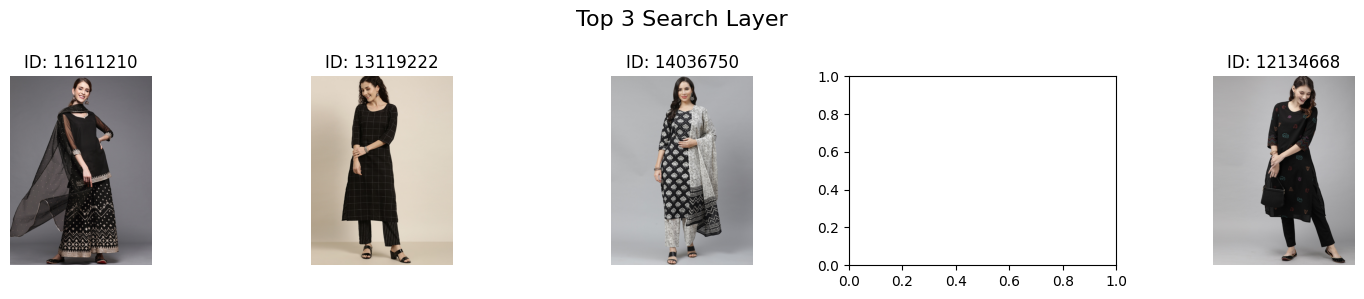

,Metadatas,Documents,Distances,IDs
0,"{'Brand': 'Inddus', 'Colour': 'Black', 'Descri...","Black solid kurta with sharara and dupatta,Bla...",0.286231,11611210
1,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...",Black and off-white checked kurta with solid p...,0.290534,13119222
2,"{'Brand': 'Yuris', 'Colour': 'Black', 'Descrip...",Black and white printed kurta with palazzos an...,0.298800,14036750
3,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...","Black and orange printed kurta with palazzos,B...",0.300005,8255313
4,"{'Brand': 'Anouk', 'Colour': 'Black', 'Descrip...","Black printed kurta with trousers,Black printe...",0.304878,12134668


In [ ]:
##For Screenshot

# Define the function to print query with a prefix and separator
def print_query_with_separator(prefix, query):
    # Print the prefix
    print(prefix)
    # Insert a newline character after every full stop
    query_with_newlines = query.replace(". ", ".\n")
    # Print the modified query
    print(query_with_newlines)

# Print the query with prefix and separator
print_query_with_separator("Query: ", query)

# Print the IDs from the results DataFrame
##print("IDs:")
#print(results_df['IDs'])


# Display images corresponding to the IDs side by side
num_images = len(results_df['IDs'])
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

# Set the title of the plot as the user query
fig.suptitle("Top 3 Search Layer", fontsize=16)

for i, item_id in enumerate(results_df['IDs']):
    # Construct the path to the image file
    image_path = os.path.join(images_folder_path, str(item_id) + '.jpg')

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"ID: {item_id}")
    else:
        print(f"Image not found for item ID: {item_id}")

plt.tight_layout()
plt.show()

results_df

In [ ]:
# Query the cache collection for results matching the user query
cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

# Print the cache results
cache_results


{'ids': [['I am looking for black salwar']],
 'distances': [[0.0]],
 'metadatas': [[{'distances0': '0.286231130361557',
    'distances1': '0.29053401947021484',
    'distances2': '0.2987998127937317',
    'distances3': '0.3000045120716095',
    'distances4': '0.3048781752586365',
    'documents0': 'Black solid kurta with sharara and dupatta,Black solid straight above knee kurta,has a sweetheart neck,three-quarter sleeves,side slits,Black embroidered sharara,has partially elasticated waistband,slip-on closure,Black embroidered dupatta,has taping borderThe model (height 58") is wearing a size SKurta fabric: poly georgette,Bottom fabric: poly georgette,Dupatta fabric: net,Dry-clean',
    'documents1': 'Black and off-white checked kurta with solid palazzos,Black and off-white checked straight knee length kurta,has a round neck,three-quarter sleeves,straight hem,side slits,Black solid palazzos,has elasticated waistband,slip-on closureTop fabric: Pure Cotton,Bottom fabric: Pure Cotton,Machin



## 5.Re-Ranking with a Cross Encoder




Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

<br>


In [ ]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

In [ ]:
# Create input pairs for the cross encoder, consisting of each query paired with each response
cross_inputs = [[query, response] for response in results_df['Documents']]

# Generate cross-encoder scores for the input pairs
cross_rerank_scores = cross_encoder.predict(cross_inputs)

# Display the cross-encoder scores
cross_rerank_scores


array([-10.316045, -10.540047, -10.677469, -10.779446, -10.484185],
      dtype=float32)

In [ ]:
# Add the cross-encoder scores to the results DataFrame
results_df['Reranked_scores'] = cross_rerank_scores

# Display the updated results DataFrame
results_df


,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Brand': 'Inddus', 'Colour': 'Black', 'Descri...","Black solid kurta with sharara and dupatta,Bla...",0.286231,11611210,-10.316045
1,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...",Black and off-white checked kurta with solid p...,0.290534,13119222,-10.540047
2,"{'Brand': 'Yuris', 'Colour': 'Black', 'Descrip...",Black and white printed kurta with palazzos an...,0.298800,14036750,-10.677469
3,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...","Black and orange printed kurta with palazzos,B...",0.300005,8255313,-10.779446
4,"{'Brand': 'Anouk', 'Colour': 'Black', 'Descrip...","Black printed kurta with trousers,Black printe...",0.304878,12134668,-10.484185


In [ ]:
# Return the top 3 results from semantic search based on the Distance
top_3_semantic = results_df.sort_values(by='Distances', ascending=False)[:3]

# Display the top 3 semantic search results
top_3_semantic

,Metadatas,Documents,Distances,IDs,Reranked_scores
4,"{'Brand': 'Anouk', 'Colour': 'Black', 'Descrip...","Black printed kurta with trousers,Black printe...",0.304878,12134668,-10.484185
3,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...","Black and orange printed kurta with palazzos,B...",0.300005,8255313,-10.779446
2,"{'Brand': 'Yuris', 'Colour': 'Black', 'Descrip...",Black and white printed kurta with palazzos an...,0.298800,14036750,-10.677469


In [ ]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Brand': 'Inddus', 'Colour': 'Black', 'Descri...","Black solid kurta with sharara and dupatta,Bla...",0.286231,11611210,-10.316045
4,"{'Brand': 'Anouk', 'Colour': 'Black', 'Descrip...","Black printed kurta with trousers,Black printe...",0.304878,12134668,-10.484185
1,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...",Black and off-white checked kurta with solid p...,0.290534,13119222,-10.540047
2,"{'Brand': 'Yuris', 'Colour': 'Black', 'Descrip...",Black and white printed kurta with palazzos an...,0.298800,14036750,-10.677469
3,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...","Black and orange printed kurta with palazzos,B...",0.300005,8255313,-10.779446


In [ ]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas","IDs"]]
top_3_RAG

,Documents,Metadatas,IDs
0,"Black solid kurta with sharara and dupatta,Bla...","{'Brand': 'Inddus', 'Colour': 'Black', 'Descri...",11611210
4,"Black printed kurta with trousers,Black printe...","{'Brand': 'Anouk', 'Colour': 'Black', 'Descrip...",12134668
1,Black and off-white checked kurta with solid p...,"{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...",13119222
2,Black and white printed kurta with palazzos an...,"{'Brand': 'Yuris', 'Colour': 'Black', 'Descrip...",14036750
3,"Black and orange printed kurta with palazzos,B...","{'Brand': 'Vishudh', 'Colour': 'Black', 'Descr...",8255313


## 6. Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 4o along with the user query and a well-engineered prompt, to generate a direct answer to the query along with brand,name and other information, rather than returning whole pages/chunks in a table format.

### Generation Layer

Certainly! Based on your query for "black salwar," I have reviewed the top relevant items from our fashion dataset. Here are some options you might find appealing:

1. **Inddus Black Solid Kurta with Sharara and Dupatta**
   - **Description**: This outfit features a solid black kurta, paired with sharara pants, and comes with a matching dupatta.
   - **Brand**: Inddus
   - **ID**: 11611210
   - **More Details**: It's a black salwar set that combines elegance and comfort, perfect for both casual and festive occasions.

2. **Anouk Black Printed Kurta with Trousers**
   - **Description**: This set includes a black printed kurta along with solid trousers, giving a stylish yet traditional look.
   - **Brand**: Anouk
   - **ID**: 12134668
   - **More Details**: The printed kurta adds vibrancy, while the solid trousers ensure a balanced and sophisticated outfit.

3. **Yuris Black and White Printed Kurta with Palazzos and Dupatta**
   - **Description**: This set comprises a contemporary black 

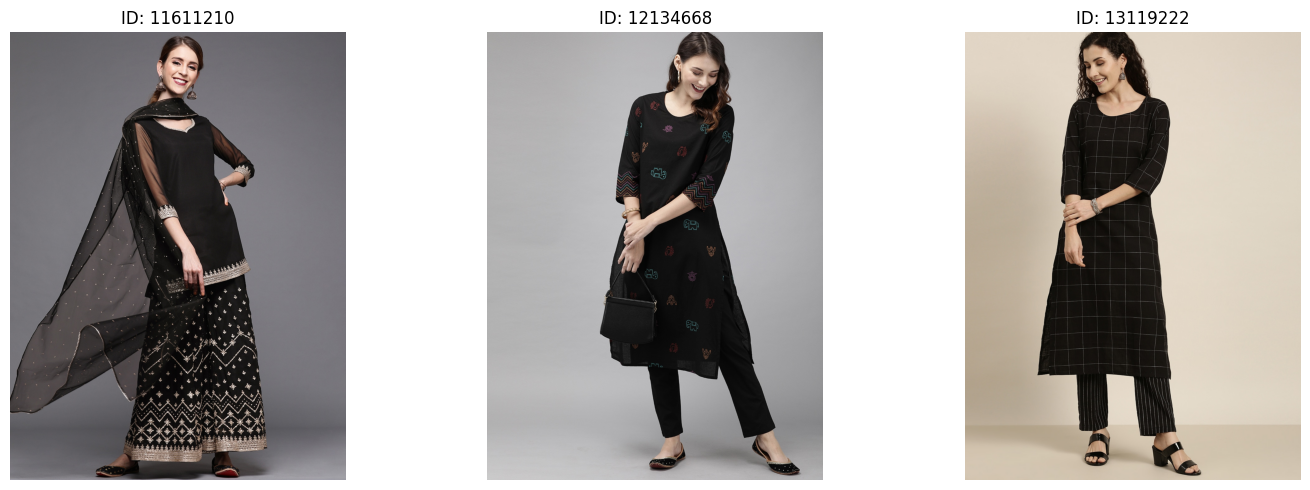

In [ ]:
def generate_response_fashion(query, top_3_RAG):
    """
    Generate a response using GPT-4o's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
        {"role": "system", "content":  "You are a helpful AI assistant in the fashion domain, specialized in providing accurate answers to fashion-related queries."},
        {"role": "user", "content": f"""You have received a query from a user looking for fashion-related information. The query is: "{query}".
                                        Additionally, you have obtained the top 3 relevant results from the fashion dataset in the dataframe '{top_3_RAG}'.

                                        The 'Documents' column in this dataframe contains descriptions of fashion items, and the 'Metadatas' column contains additional information such as item name, brand.

                                        Your task is to use the information provided in '{top_3_RAG}' to generate a response to the query "{query}". Ensure that your response is informative and relevant to the user's query. Utilize the metadata to cite the relevant fashion items.

                                        Please adhere to the following guidelines:
                                        1. Provide accurate and relevant information based on the user query and the top 3 search results.
                                        2. You may use any relevant details from the dataframe to craft your response.
                                        3. If any of the fashion items contain tables or structured information, format and present it clearly.
                                        4. Use the metadata to cite the names, brands of the relevant fashion items.
                                        5. If you are unable to provide a complete answer, offer guidance on where the user can find further information within the cited fashion items.
                                        6. As a user-facing assistant, focus on delivering a direct and concise response without delving into technical details.
                                        7. Please note that detailed price and rating information might change from time to time. For more details,you should recommend to visit our website page.

                                        Your response should directly address the user's query and include citations for the referenced fashion items. Present the information in a well-organized and easily understandable format.
                                        """},
    ]

    response = openai.chat.completions.create(
        model="gpt-4o",
        messages=messages
    )

    # Extracting p_ids directly from the 'IDs' column in top_3_RAG
    p_ids = top_3_RAG['IDs'].head(3).tolist()

    # Returning response and p_ids
    return response.choices[0].message.content, p_ids

# Generate response and p_ids based on the provided query and top_3_RAG DataFrame
response, p_ids = generate_response_fashion(query, top_3_RAG)

# Print the response
print(response)



# Display the images corresponding to the IDs obtained from the response side by side
num_images = len(p_ids)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, item_id in enumerate(p_ids):
    # Construct the path to the image file
    image_path = os.path.join(images_folder_path, str(item_id) + '.jpg')

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"ID: {item_id}")
    else:
        print(f"Image not found for item ID: {item_id}")

plt.tight_layout()
plt.show()


## Conclusion

Comparing the search query results obtained from both the search layer and the generation layer, it's evident that the output from the generation layer is more detailed and easier to comprehend. While the search layer provides relevant results based on keyword matching or other predefined criteria, the generation layer leverages advanced AI models like GPT-4o to generate responses dynamically, incorporating context and generating detailed information tailored to the query.

The generation layer's ability to understand the query context and generate responses in natural language makes the output more informative and user-friendly. It can provide nuanced explanations, summaries, or even creative interpretations based on the input query. This results in responses that are not only relevant but also engaging and easy to read, enhancing the overall user experience.

Furthermore, the generation layer's flexibility allows it to adapt to various query formats and provide customized responses, catering to different user preferences and requirements. This versatility makes it a valuable tool for tasks requiring comprehensive understanding and communication of information.

In summary, while the search layer serves its purpose of retrieving relevant information efficiently, the generation layer significantly enhances the quality and readability of the output, making it a preferred choice for tasks where detailed and user-friendly responses are essential.
